In [7]:
from numpy import *
from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt
#генерируем случайные х и у
delta = 1.0
x = linspace(-10,10,20)
y = x**3+delta*(rand(20))
x += delta*(rand(20))
#записывае данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')
# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')
print(x)
print(y)



[-9.56427546 -8.81562393 -7.51956929 -5.94913646 -5.69609983 -4.27457686
 -2.77569361 -1.80674503 -1.10432691 -0.46205282  0.73491691  2.48187573
  3.47415527  4.38072565  5.44597353  6.3694595   7.40462091  8.37227772
  9.21269234 10.41223702]
[-9.99300617e+02 -7.15962319e+02 -4.91956966e+02 -3.19740825e+02
 -1.93990279e+02 -1.05295830e+02 -4.91254745e+01 -1.75797999e+01
 -3.21726811e+00 -5.75458936e-02  9.53905771e-01  4.15182450e+00
  1.82577482e+01  5.05239549e+01  1.06815007e+02  1.94607455e+02
  3.20546737e+02  4.92492215e+02  7.16501422e+02  1.00060784e+03]


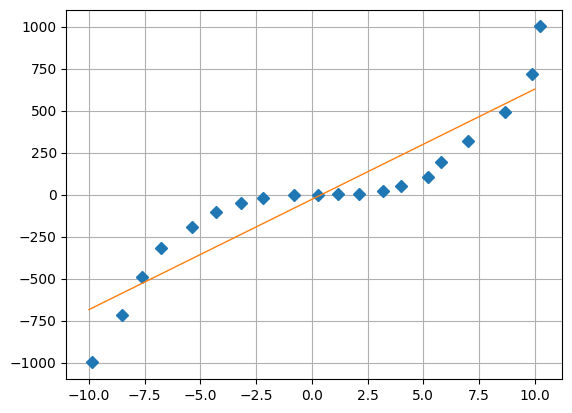

In [47]:
# Нахождение коэффициентов функции вида у =bx + с методом наименьших квадратов # задаем вектор т = [x**2, x, E]
m = vstack((x, ones(20))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-10, 10, 101)
# рисуем точки
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec+s[1],"-", lw=1)
plt.grid()

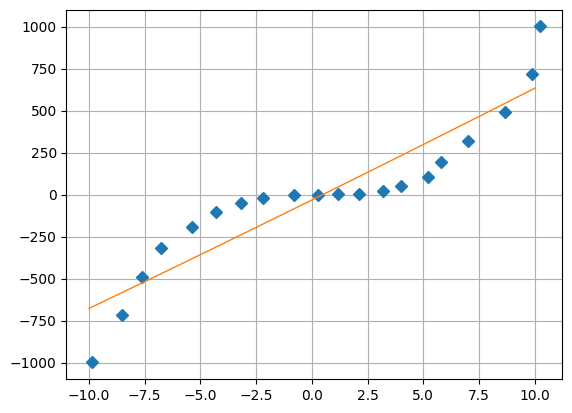

In [48]:
m = vstack((x**2, x, ones(20))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-10,10, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем крибую вида у = ax*2 + bx + с, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],"-", lw=1)
plt.grid()


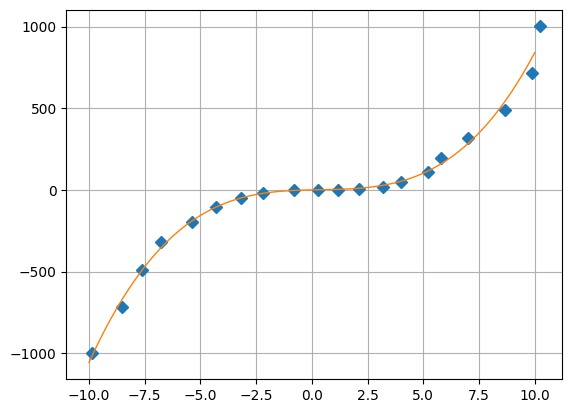

In [49]:
m = vstack((x**3,x**2, x, ones(20))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-10, 10, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем крибую вида у = ax*2 + bx + с, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2+x_prec*s[2]+s[3],"-", lw=1)
plt.grid()


In [8]:
from scipy.optimize import curve_fit 
import scipy

In [9]:
#решение
#1
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75) 
def f(x, be, b1):
    return be + b1*x
# зададим массив точек xі 
xdata=np.linspace(1, 10, 50)
# создаем теоретически правильные значения точек уі (без шума)
y=f(xdata, *beta) # зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.2438342 0.7522103]
0.0001868632417629249
0.09915633384231334


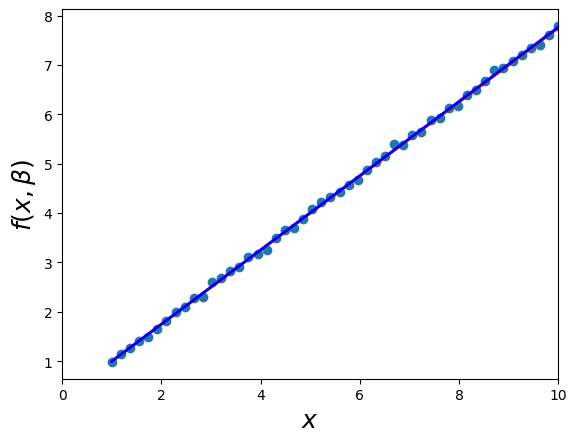

In [10]:
fig, ax = plt.subplots()
ax. scatter(xdata, ydata) 
ax. plot(xdata, y, 'r', lw=2) 
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 10) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

[0.21890412 0.75391314 0.50007581]
0.0004552162158599256


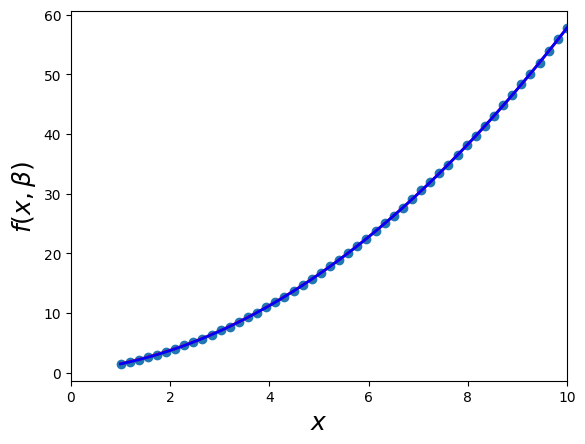

In [11]:
#решение #2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b - (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5) 
def f(x, be, b1, b2): 
    return be + b1 * x + b2 * x * x
# зададим массив точек xі
xdata = np.linspace(1, 10, 50) # создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta) # зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение residuals = ydata - f(xdata, *beta_opt) fres - sum(residuals**2) print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax. plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 10) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt. show()

[0.96438845 2.01850917]
0.0001231441694872072


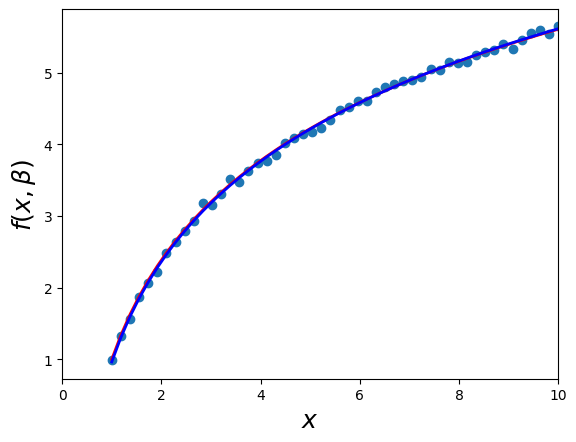

In [12]:
#решение #3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
beta = (1, 2) 
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив точек xі 
xdata = np.linspace(1, 10, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt) #Вычислим линейное отклонение
lin_dev = sum(beta_cov[0]) 
print(lin_dev)
#Вычислим квадратичное отклонение residuals = ydata - f(xdata, *beta_opt) fres = sum(residuals**2) print(fres)
fig, ax = plt.subplots() 
ax.scatter(xdata, ydata)
ax. plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 10)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

In [13]:
#решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
beta = (1, 2) 
def f(x, be, b1):
    return be * x ** b1
# зададим массив точек xі
xdata = np.linspace(1, 10, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[1.000294   1.99994952]
1.4780637180615155e-06
0.13519473350843222


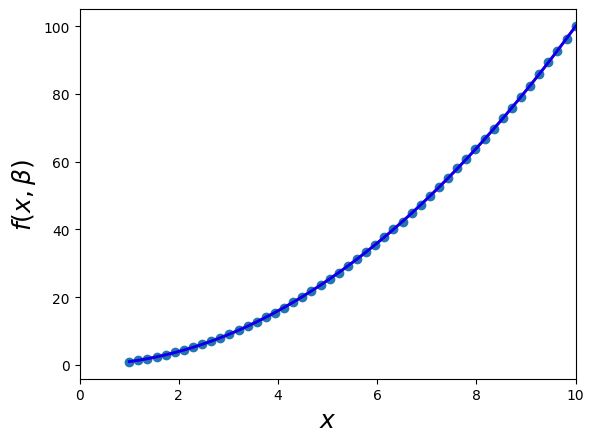

In [14]:
fig, ax = plt.subplots() 
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 10) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [19]:
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
dataframe = pd.read_csv(url)
dataframe

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [21]:
print(dataframe.shape)
dataframe.describe()

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


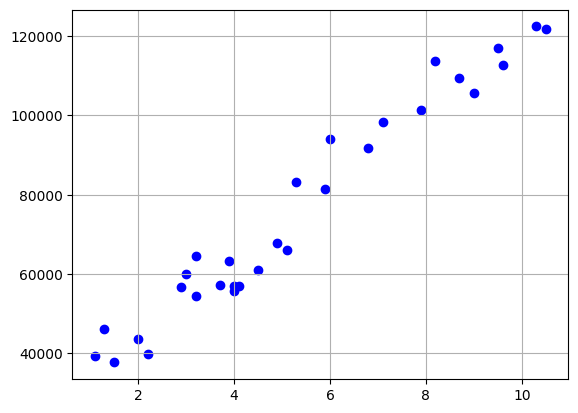

In [32]:
plt.grid()
plt.scatter(dataframe['YearsExperience'],dataframe["Salary"],color ='b')

In [26]:
X = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, 1].values
print(X)
print(y)
 # Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы.
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)
# далее можно обучить алгоритм линейной регрессии # необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit() 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]


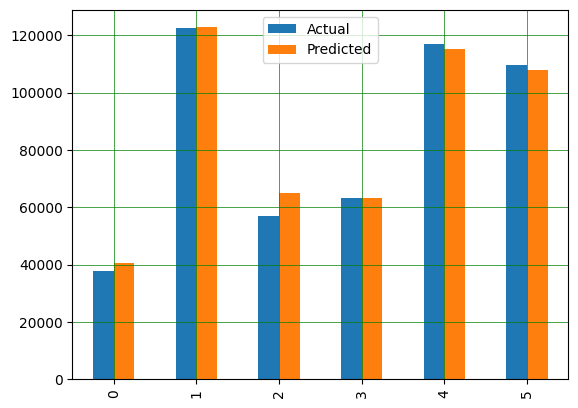

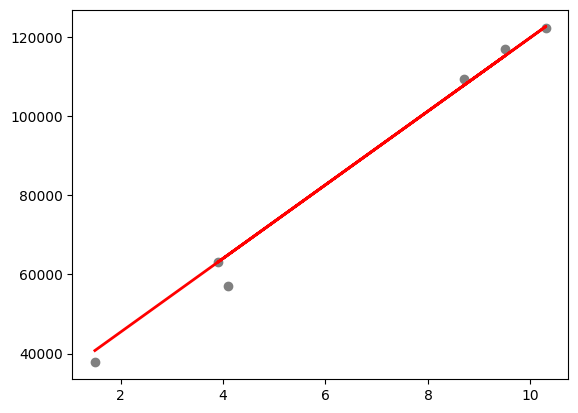

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


In [31]:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which="major", linestyle="-",linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#построим линию регрессии с тестовыми данными 
plt.scatter(X_test, y_test, color='gray') 
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
df

In [179]:
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
dataframe = pd.read_csv(url)
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [137]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns

In [199]:
y =dataframe["quality"]
u = dataframe.drop(columns='quality') 
X = u
X = np.c_[X, np.ones(X.shape[0])] 
y = np.c_[y]
linreg = np.linalg.lstsq(X, y, rcond=None)[0] 
print(linreg)


[[ 2.49905527e-02]
 [-1.08359026e+00]
 [-1.82563948e-01]
 [ 1.63312698e-02]
 [-1.87422516e+00]
 [ 4.36133331e-03]
 [-3.26457970e-03]
 [-1.78811638e+01]
 [-4.13653144e-01]
 [ 9.16334413e-01]
 [ 2.76197699e-01]
 [ 2.19652084e+01]]


In [274]:
x = dataframe.drop('quality',axis = 1)
y = dataframe['quality']
#формируем DataFrames из двух списков
new_y = np.array(y)
df1 = pd.DataFrame(new_y)

new_x = np.array(x)
df2 = pd.DataFrame(new_x)

df1 = df1.rename(columns = {0: 'y'}, inplace = False) 
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3', 3: 'x4',4: 'x5',5: 'x6', 6: 'x7', 7: 'x8', 8: 'x9',9: 'x10',10: 'x11'}, inplace = False)
frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")

dataframe.head(1600)
dataframe.describe()
dataset.describe()
# разделим данные на метки и атрибуты
X = dataset[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11']]
y = dataset['y']
# разделим данные на обучающую и тестовую выборки 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99999999)
#для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() класса LinearRegression
regressor=LinearRegression() 
regressor.fit(X_train, y_train)
#выведем коэффициенты модели 
cdf = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
print(cdf)
#Чттобы сделать прогнозы на тестовых данных, выполните следующий код 
y_pred = regressor.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
#Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE 
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))



                      Coefficient
fixed acidity            0.036724
volatile acidity        -1.074072
citric acid             -0.265121
residual sugar           0.007124
chlorides               -1.988356
free sulfur dioxide      0.005125
total sulfur dioxide    -0.002603
density                -18.879959
pH                      -0.449746
sulphates                0.946659
alcohol                  0.293902
Mean Squared Error: 0.4079552890279251


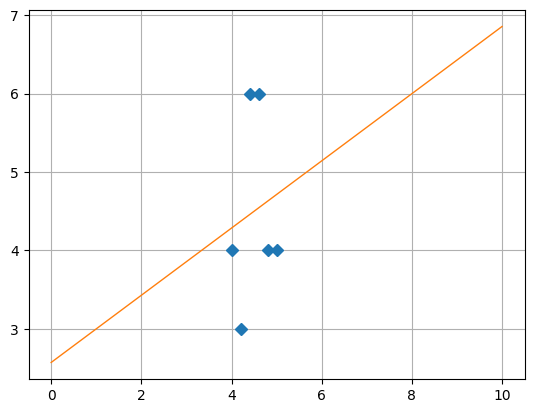

In [289]:


from numpy import *
from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt
x = fromfile('x2.txt', float, sep='\n')
y = fromfile('y2.txt', float, sep='\n')
# Нахождение коэффициентов функции вида у =bx + с методом наименьших квадратов # задаем вектор т = [x**2, x, E]
m = vstack((x, ones(6))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# рисуем точки
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec+s[1],"-", lw=1)
plt.grid()


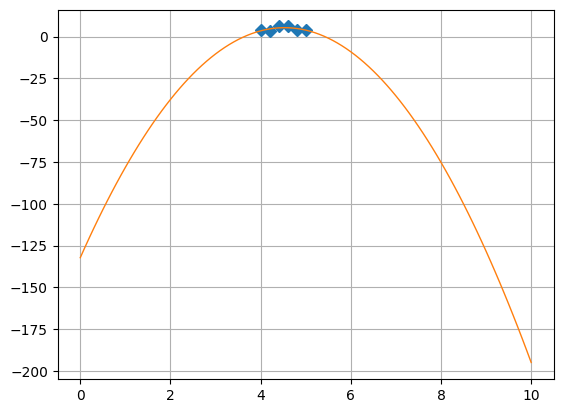

In [288]:
# Нахождение коэффициентов функции вида у =bx + с методом наименьших квадратов # задаем вектор т = [x**2, x, E]
m = vstack((x**2,x, ones(6))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# рисуем точки
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1]*x_prec+s[2],"-", lw=1)
plt.grid()